In [1]:
import numpy as np # data processed in the form of array
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os #libray used to working in operating system files and processes
import matplotlib.pyplot as plt #data visulization library

In [2]:
df=pd.read_csv(r"C:\Users\SUKUN\Downloads\bitcoin1.csv")

In [3]:
df=df.iloc[0:,0:7]

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2016,430.721008,436.246002,427.515015,434.334015,434.334015,3.627890e+07
1,02-01-2016,434.622009,436.062012,431.869995,433.437988,433.437988,3.009660e+07
2,03-01-2016,433.578003,433.743011,424.705994,430.010986,430.010986,3.963380e+07
3,04-01-2016,430.061005,434.516998,429.084015,433.091003,433.091003,3.847750e+07
4,05-01-2016,433.069000,434.182007,429.675995,431.959991,431.959991,3.452260e+07
...,...,...,...,...,...,...,...
2188,28-12-2021,50679.859380,50679.859380,47414.210940,47588.855470,47588.855470,3.343038e+10
2189,29-12-2021,47623.871090,48119.742190,46201.496090,46444.710940,46444.710940,3.004923e+10
2190,30-12-2021,46490.605470,47879.964840,46060.312500,47178.125000,47178.125000,2.668649e+10
2191,31-12-2021,47169.371090,48472.527340,45819.953130,46306.445310,46306.445310,3.697417e+10


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2192.000000,2192.000000,2192.000000,2192.000000,2193.000000,2.192000e+03
mean,13011.519336,13368.885385,12621.631785,13030.902498,13025.165761,1.758391e+10
std,16481.574323,16936.855029,15962.173599,16491.103132,16489.529609,2.085386e+10
min,365.072998,374.950012,354.914001,364.330994,364.330994,2.851400e+07
25%,2587.370056,2684.457458,2514.867554,2589.552551,2589.409912,1.183620e+09
50%,7397.884033,7536.833496,7235.094727,7399.348144,7397.796875,9.214114e+09
75%,11354.720462,11574.499755,11027.832518,11358.846680,11358.662110,2.887192e+10
max,67549.734380,68789.625000,66382.062500,67566.828130,67566.828130,3.509680e+11


In [6]:
df.isnull().sum()

Date         1
Open         1
High         1
Low          1
Close        1
Adj Close    0
Volume       1
dtype: int64

In [7]:
df1=df[["Adj Close"]]
X=[]
Y=[]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(df1)


In [9]:
df1

array([[0.00104167],
       [0.00102834],
       [0.00097734],
       ...,
       [0.69660795],
       [0.68363701],
       [0.70417743]])

In [10]:
step=60
for i in range(len(df1)-step-1):
    a=df1[i:(step+i)]
    X.append(a)
    
    Y.append(df1[i+step])

In [11]:
X[0]

array([[1.04167291e-03],
       [1.02833967e-03],
       [9.77344515e-04],
       [1.02317640e-03],
       [1.00634649e-03],
       [9.63863246e-04],
       [1.39454654e-03],
       [1.32285288e-03],
       [1.27834827e-03],
       [1.24489426e-03],
       [1.25139717e-03],
       [1.06185054e-03],
       [1.01246250e-03],
       [9.81734442e-04],
       [0.00000000e+00],
       [3.45299922e-04],
       [2.67371270e-04],
       [3.39823756e-04],
       [2.35378054e-04],
       [8.31799701e-04],
       [6.83471611e-04],
       [2.70243083e-04],
       [3.44630095e-04],
       [5.74978842e-04],
       [4.07648825e-04],
       [4.14002785e-04],
       [4.55950185e-04],
       [2.37461518e-04],
       [2.25333963e-04],
       [2.07194845e-04],
       [6.60095114e-05],
       [1.29831574e-04],
       [1.50545061e-04],
       [8.35982477e-05],
       [3.75923531e-04],
       [3.30612967e-04],
       [1.81407083e-04],
       [1.82865243e-04],
       [1.35649677e-04],
       [1.74070883e-04],


In [12]:
X=np.array(X)
Y=np.array(Y)

In [13]:
X[2][0:4]

array([[0.00097734],
       [0.00102318],
       [0.00100635],
       [0.00096386]])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [15]:
X_train = X_train.reshape(-1, 1, 60)
X_test  = X_test.reshape(-1, 1, 60)
y_train = y_train.reshape(-1, 1, 1)
y_test = y_test.reshape(-1, 1, 1)


In [16]:
X_train[1]

array([[0.00809872, 0.00813761, 0.00801305, 0.00808524, 0.00615194,
        0.00655486, 0.00683982, 0.00675691, 0.00680729, 0.00695217,
        0.00808909, 0.00777184, 0.00795717, 0.00789695, 0.0082952 ,
        0.00833811, 0.00828364, 0.00786215, 0.00799391, 0.00823266,
        0.00826486, 0.00829224, 0.00826108, 0.00827426, 0.00901859,
        0.00929567, 0.0096346 , 0.00990408, 0.01009738, 0.00986584,
        0.0100267 , 0.01037192, 0.01039751, 0.00937543, 0.00929047,
        0.00952523, 0.00944682, 0.00931976, 0.00952671, 0.00957031,
        0.00986733, 0.01014663, 0.0102688 , 0.01017133, 0.01064914,
        0.01117472, 0.01120656, 0.01193987, 0.01204344, 0.0115994 ,
        0.01191725, 0.01213703, 0.01213703, 0.0127699 , 0.01319414,
        0.01355097, 0.01325574, 0.01343386, 0.01351883, 0.01278537]])

In [17]:
X_train.shape

(1428, 1, 60)

In [18]:
y_train.shape

(1428, 1, 1)

In [19]:
from keras.models import Sequential  
from keras.layers import Dense , BatchNormalization , Dropout , Activation 
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam , SGD , RMSprop

In [20]:
model = Sequential()

model.add(LSTM(256 , input_shape = (X_train[0].shape) , return_sequences=True))

model.add(Dropout(0.4))

model.add(LSTM(256))

model.add(Dropout(0.4))

model.add(Dense(64))
model.add(Dense(1, activation='relu'))

In [21]:
model.compile(loss="mean_squared_error", optimizer=Adam(lr = 0.001) )

In [22]:
X_train.shape[2]

60

In [23]:
model.fit(X_train, y_train, epochs=65 , batch_size =60 )

Epoch 1/65
24/24 [==============================] - 0s 7ms/step - loss: 0.0190
Epoch 2/65
24/24 [==============================] - 0s 7ms/step - loss: 0.0039
Epoch 3/65
24/24 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 4/65
24/24 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 5/65
24/24 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 6/65
24/24 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 7/65
24/24 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 8/65
24/24 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 9/65
24/24 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 10/65
24/24 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 11/65
24/24 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 12/65
24/24 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 13/65
24/24 [==============================

In [24]:
prediction=model.predict(X_test)
y_test.shape

(704, 1, 1)

In [25]:
y__test=np.array(y_test).reshape(-1,1)

In [26]:
y__test.shape

(704, 1)

In [27]:
prediction=scaler.inverse_transform(prediction)
test_val=scaler.inverse_transform(y__test)

In [28]:
test_val[0]

array([4025.248291])

In [29]:
pred=prediction[100:200]

In [30]:
pred

array([[60289.676  ],
       [ 7434.9297 ],
       [ 3320.0366 ],
       [37498.156  ],
       [ 2972.7527 ],
       [ 3748.6333 ],
       [36012.05   ],
       [ 9424.215  ],
       [ 5778.2993 ],
       [  753.55994],
       [ 3711.9275 ],
       [ 4160.9043 ],
       [ 6280.6533 ],
       [11060.464  ],
       [13672.417  ],
       [10790.234  ],
       [34227.01   ],
       [ 9224.014  ],
       [ 3483.5447 ],
       [11339.026  ],
       [  364.331  ],
       [ 2241.7334 ],
       [58159.883  ],
       [  364.331  ],
       [ 6402.011  ],
       [10337.719  ],
       [11908.262  ],
       [  364.331  ],
       [ 8120.4727 ],
       [ 9095.025  ],
       [11498.896  ],
       [ 4764.361  ],
       [ 9322.893  ],
       [ 3423.466  ],
       [  400.5244 ],
       [ 9657.9795 ],
       [ 3379.5735 ],
       [ 9067.466  ],
       [ 5748.0425 ],
       [58266.984  ],
       [  364.331  ],
       [19931.488  ],
       [11068.983  ],
       [ 6509.251  ],
       [10116.745  ],
       [ 9

In [31]:
test_val1=test_val[100:200]

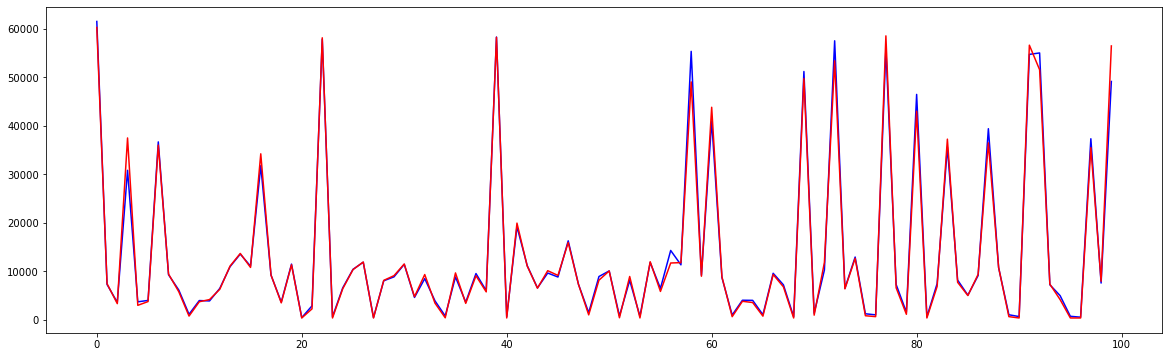

In [32]:
ytrain=np.array(y_train).reshape(-1)
plt.figure(figsize=(20,6))

plt.plot(test_val1,'b')
plt.plot(pred,'r')

In [33]:
ytrain[0:5]

array([0.04906023, 0.01169107, 0.00348024, 0.00436378, 0.10229733])

In [34]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor as rfr


In [35]:
df_test=pd.read_csv(r"C:\Users\SUKUN\Downloads\bitcoin_test.csv")

In [36]:
frame=[df[:-1], df_test]
df_set=pd.concat(frame)

In [37]:
df_set=df_set['Adj Close']

In [38]:
dfinal=df_set[len(df1)-step: ]

In [39]:
dfinal=np.array(dfinal).reshape(-1,1)

In [40]:
dfinal=scaler.fit_transform(dfinal)

In [41]:
testing=[]
res=[]
for i in range(len(dfinal)-step-1):
    a=dfinal[i:(step+i)]
    testing.append(a)
    res.append(dfinal[step+i])

In [45]:
testing=np.array(testing).reshape(-1,1,60)

In [46]:
pred_test=model.predict(testing)

In [47]:
pred_test[:5]

array([[0.35030094],
       [0.35482353],
       [0.34098813],
       [0.32217136],
       [0.29032847]], dtype=float32)

In [48]:
pred_test[0]

array([0.35030094], dtype=float32)

In [49]:
res1=scaler.inverse_transform(res)

In [50]:
pred_test1=scaler.inverse_transform(pred_test)

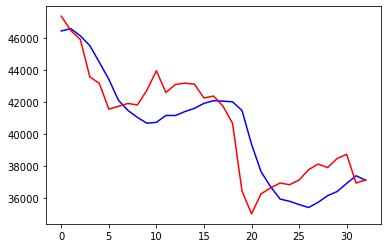

In [51]:
plt.plot(pred_test1,'b')
plt.plot(res1,'r')

In [52]:
r2_score(pred_test1, res1)

0.7047708361186782